In [ ]:
import numpy as np
import pandas as pd

import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

import os
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path1=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train'
x=[]
y=[]

for i in os.listdir(path1):
    print( i)
    for j in os.listdir(os.path.join(path1,i)):
         images_matrices=cv2.imread(j)
         x.append(images_matrices)
         y.append(i)
            
print('process has successfully ended')

In [ ]:
path1=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train\NORMAL'
x=[]
y=[]

for i in os.listdir(path1):
    print(i)

In [ ]:
path1=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train\NORMAL\IM-0115-0001.jpeg'

image1=cv2.imread(path1)
print(image1)
plt.imshow(image1)

In [ ]:
path1=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train\NORMAL\IM-0115-0001.jpeg'

image1_matrix=cv2.imread(path1)
plt.imshow(image1_matrix)
plt.title('normal')

In [ ]:
image1_matrix.shape

In [ ]:
image2_matrix=cv2.resize(image1_matrix,(200,200))
plt.imshow(image2_matrix);

In [ ]:
path1=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train'
count=0

for i in os.listdir(path1):
    print(i)
    for j in os.listdir(os.path.join(path1,i)):
        
        images_matrices=cv2.imread(j)
    
    #count+=1
    #if count<5:
        #plt.subplot(1,5,count+1)
        plt.imshow(images_matrices)
    

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
import numpy as np
import pandas as pd
import os
import glob

import cv2
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_ds1=image_dataset_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train',
                                      labels='inferred',
                                      label_mode='int',
                                      image_size=(200,200),
                                       batch_size=41
                                      )

Found 5216 files belonging to 2 classes.


In [8]:
train_ds1

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# To plot the images inside the path folders using method2

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


<Figure size 500x500 with 0 Axes>

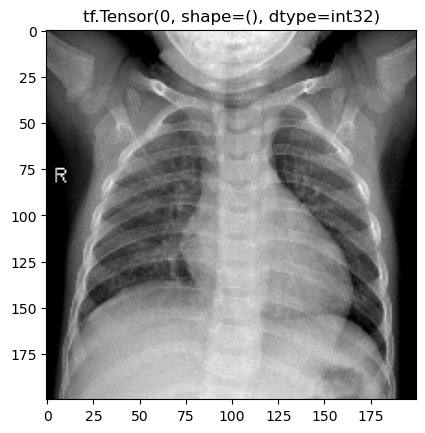

<Figure size 500x500 with 0 Axes>

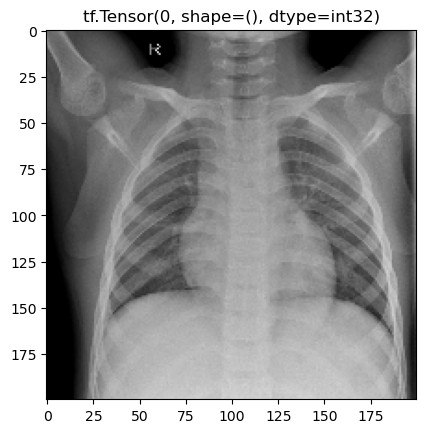

<Figure size 500x500 with 0 Axes>

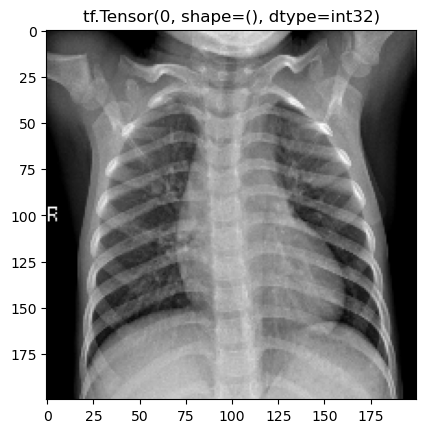

<Figure size 500x500 with 0 Axes>

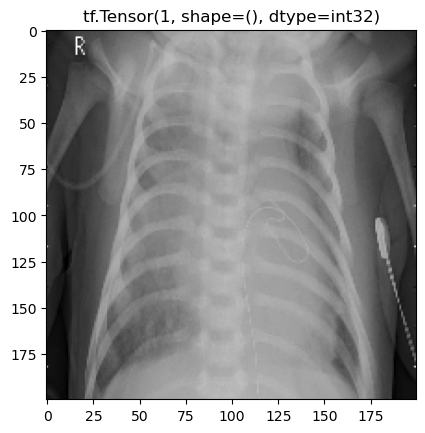

<Figure size 500x500 with 0 Axes>

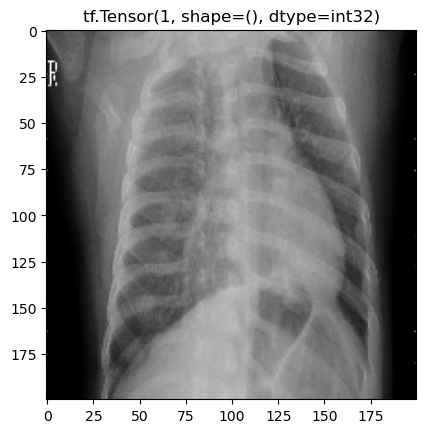

In [25]:
for images,labels in train_ds1.take(1):
    
    #plt.figure(figsize=[10,10])
    for i in range(5):
        plt.figure(figsize=[5,5])
        plt.subplots()
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(labels[i])
        print(images[i].shape)
        #plt.yticks(rotation=90)
        #plt.xticks(rotation=90)

# Data Augmentation for includng different angels in the images

In [40]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
    [ tf.keras.layers.RandomFlip("horizontal"),
      tf.keras.layers.RandomRotation(0.1),
      tf.keras.layers.RandomZoom(0.2)])

# Now , lets build our CNN model

In [42]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Convolution2D,Dropout,Dense,Flatten,BatchNormalization,MaxPooling2D

In [43]:
model = Sequential()
model.add(data_augmentation)

In [45]:
model.add(tf.keras.layers.Rescaling(1/255))

In [46]:
model.add(BatchNormalization(input_shape=(200,200,3)))
        
model.add(Convolution2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D())  

model.add(Convolution2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D()) 

model.add(Convolution2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D()) 

In [47]:
model.add(Flatten())

In [48]:
model.add(Dense(32,'relu'))
model.add(Dense(64,'relu'))
model.add(Dense(32,'relu'))
model.add(Dense(0.3))
model.add(Dense(10,'softmax'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model2=model.fit(train_x,train_y,epochs=10,verbose=1)
model2

NameError: name 'train_x' is not defined

In [58]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import matplotlib.pyplot as plt

In [79]:
ds = image_dataset_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train',
                                  validation_split=0.2, subset="training",
                                  image_size=(200,200),
                                  seed=42,  batch_size=32)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [61]:
AUTOTUNE = tf.data.AUTOTUNE
ds = ds.cache().prefetch(buffer_size=AUTOTUNE)

In [83]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Rescaling(1/255),
    
  tf.keras.layers.BatchNormalization(input_shape=(32,32,3)),
    
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    
  tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
    
  tf.keras.layers.Dense(10,'softmax')])

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [85]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
model2=model.fit(ds, epochs=3)

Epoch 1/3
131/131 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7303 - loss: 0.6172
Epoch 2/3
131/131 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9047 - loss: 0.2419
Epoch 3/3
131/131 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9281 - loss: 0.1846


In [ ]:
import pickle

pickle.load(model,r'E:\pickled_models')

In [95]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

print('\nTest accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5625 - loss: 1.5632

Test accuracy: 0.5625


In [108]:
import pickle

In [112]:
pickle.dump(model,open(r'E:\pickled_models'), 'wb' )

PermissionError: [Errno 13] Permission denied: 'E:\\pickled_models'

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [104]:
import tensorflow

In [105]:
val_datagen=tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [107]:
val_ds=val_datagen(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\val',
                           target_size=(200,200),
                           batch_size=41)

TypeError: 'ImageDataGenerator' object is not callable

In [88]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

In [89]:
test_ds1 = test_datagen.flow_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\test',
                                                    batch_size = 41, 
                                                    target_size = (200,200))

Found 624 images belonging to 2 classes.


In [93]:
history = model.fit(
            ds,
            validation_data = test_ds1,
            epochs = 3,
            verbose = 1)

Epoch 1/3
 11/131 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.9365 - loss: 0.1653

KeyboardInterrupt: 

In [72]:
test_ds = image_dataset_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\val',
                                  image_size=(200,200), 
                                  batch_size=41)

Found 16 files belonging to 2 classes.


In [ ]:
tf.keras.layers.RandomFlip("horizontal_and_vertical"),
tf.keras.layers.RandomRotation(0.2),
tf.keras.layers.Rescaling(1/255)

In [77]:
normalization_layer = tf.keras.layers.Rescaling(1/255)


normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

#training_image_batch,training_labels_batch = next(iter(normalized_training_set))

In [78]:
model.predict(normalized_test_ds)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 28800, but received input with shape (16, 16928)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 200, 200, 3), dtype=float32)
  • training=False
  • mask=None

In [74]:
model3=model.fit(ds,epochs=10, verbose=1)

In [75]:
model.predict(test_ds)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 28800, but received input with shape (16, 16928)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 200, 200, 3), dtype=float32)
  • training=False
  • mask=None